In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Load the dataset
df = pd.read_csv(r"C://Users//dell//Downloads//WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()
df.duplicated().sum()



0

In [10]:
df['Attrition'].value_counts(normalize=True)


Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

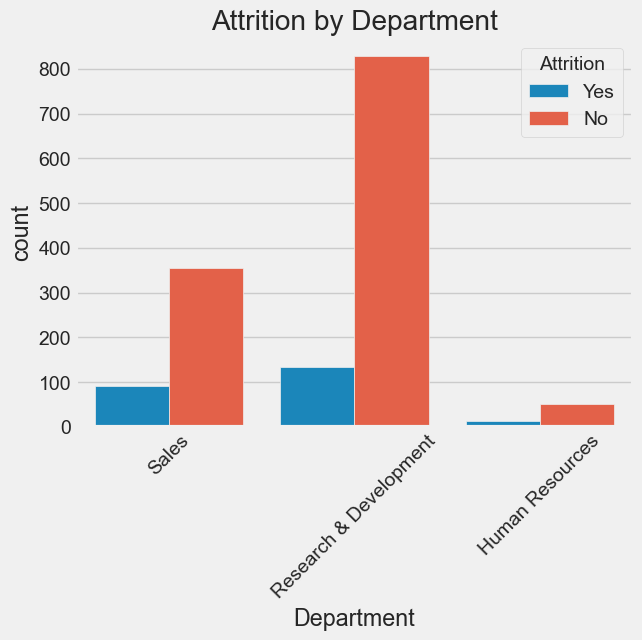

In [12]:
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()


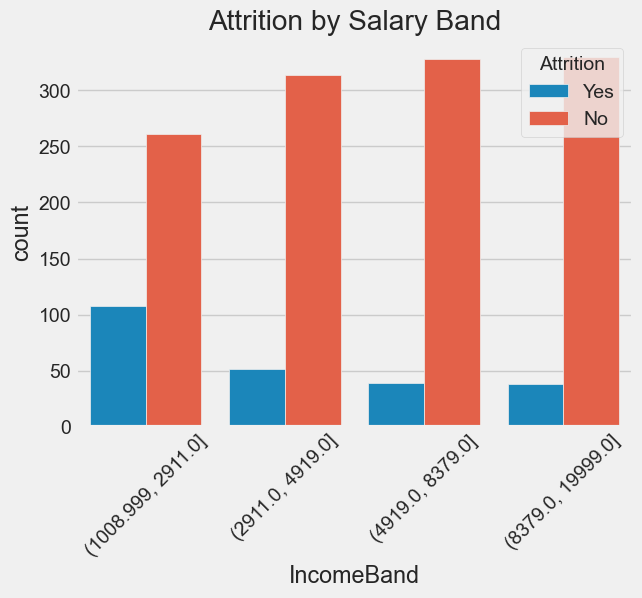

In [14]:
df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=4)
sns.countplot(data=df, x='IncomeBand', hue='Attrition')
plt.title('Attrition by Salary Band')
plt.xticks(rotation=45)
plt.show()


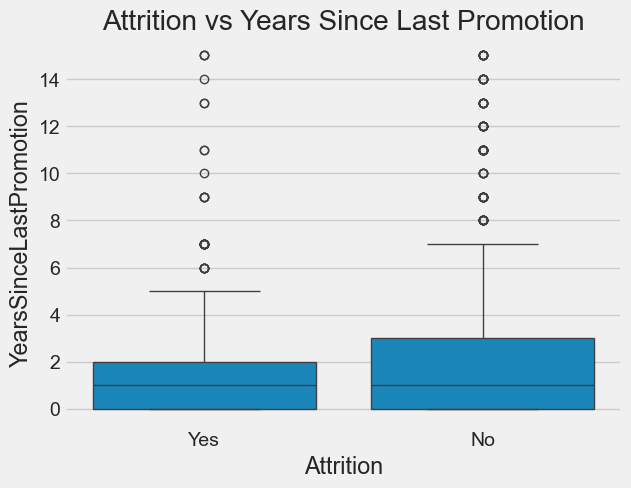

In [16]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Attrition vs Years Since Last Promotion')
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C://Users//dell//Downloads//WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Make a copy
df_model = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding on object (categorical) columns
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        df_model[col] = le.fit_transform(df_model[col])

# ✅ Now display first 5 rows
df_model.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X = df_model.drop(['Attrition', 'EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount'], axis=1)
y = df_model['Attrition']  # Already encoded: Yes=1, No=0


In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)


In [22]:
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.826530612244898
Confusion Matrix:
 [[237  18]
 [ 33   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.25      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.56      0.54      0.55       294
weighted avg       0.79      0.83      0.81       294



In [28]:
pip install scikit-learn 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
model = LogisticRegression(max_iter=5000)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then train logistic regression on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [38]:
pip install shap


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 1.1 MB/s eta 0:00:00


In [2]:
import shap

# 1. Initialize the explainer (use TreeExplainer because you used Decision Tree model)
explainer = shap.TreeExplainer(model)

# 2. Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# 3. Summary Plot (to visualize feature importance)
shap.summary_plot(shap_values, X_test)


NameError: name 'model' is not defined

<Figure size 640x480 with 0 Axes>

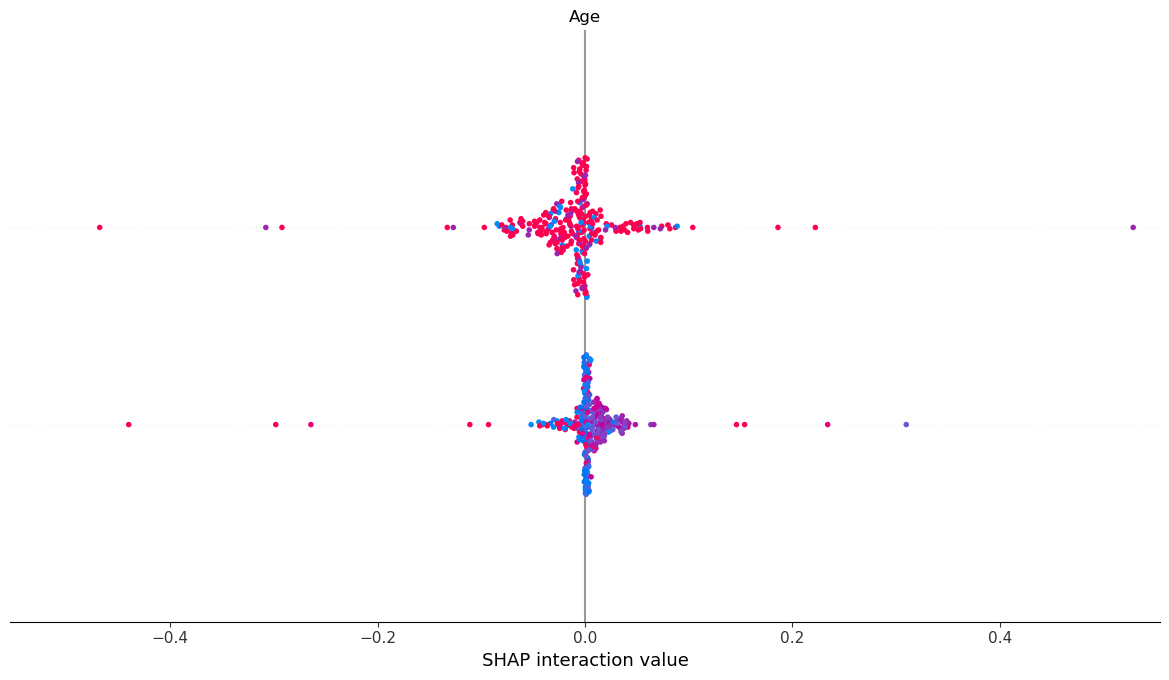

In [1]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import shap
import matplotlib.pyplot as plt

# 2. Load the dataset
df = pd.read_csv(r"C://Users//dell//Downloads//WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 3. Preprocess (Label Encoding for categorical variables)
from sklearn.preprocessing import LabelEncoder
df_model = df.copy()
le = LabelEncoder()
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        df_model[col] = le.fit_transform(df_model[col])

# 4. Split features and target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# 5. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 7. Now do SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 8. Plot the SHAP summary
shap.summary_plot(shap_values, X_test)
